In [21]:
import pandas as pd
from utils import *

In [8]:
data_processed=pd.read_pickle('preprocessedtext.pkl')
data_processed

,index,sentiment,text,target,processedText
0,670935,0,"@TheRealScarab PA system bugs are a bummer, so...",0,personal assistant system bugs summer sorry
1,649589,0,oh daaamnnn! the firemen ball's on the 14th an...,0,overhead damn firemen ball 14th I cannes signi...
2,2028,0,"I don't want to be cold in April, but I am",0,I want time cold april I ante meridian amplitu...
3,669856,0,@JaredOngie haha its too cold down here bt ot...,0,haha I think think cold instant message fine s...
4,458897,0,Upset I can't find my CHI!,0,upset I find miss chi
...,...,...,...,...,...
139995,860453,4,@lynnnein Lmao I think I'll always have growin...,1,laugh ass I think I grow pains grow
139996,1070764,4,"@marinavorobyev no doubt, we have to support e...",1,doubt time support
139997,978520,4,"now on, gonna have a word of the day todays w...",1,word day todays word hmm apocalypse
139998,1502159,4,@LolaHedoOnline awful and sweaty are two of my...,1,awful sweat miss favorite things lime face


# Text to tfidf

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(data_processed['processedText'], data_processed.target, test_size=0.2, random_state=0)

tfidf_vectorizer_train = TfidfVectorizer()
tfidf_vectorizer_train.fit(data_processed['processedText'])
x_train_tfidf = tfidf_vectorizer_train.transform(x_train)
x_test_tfidf = tfidf_vectorizer_train.transform(x_test)


# Basic models

## LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train_tfidf, y_train)
y_pred_logreg = logreg.predict(x_test_tfidf)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f'Accuracy: {accuracy_logreg}')

Accuracy: 0.7438928571428571


c:\Users\Kevin Zhu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


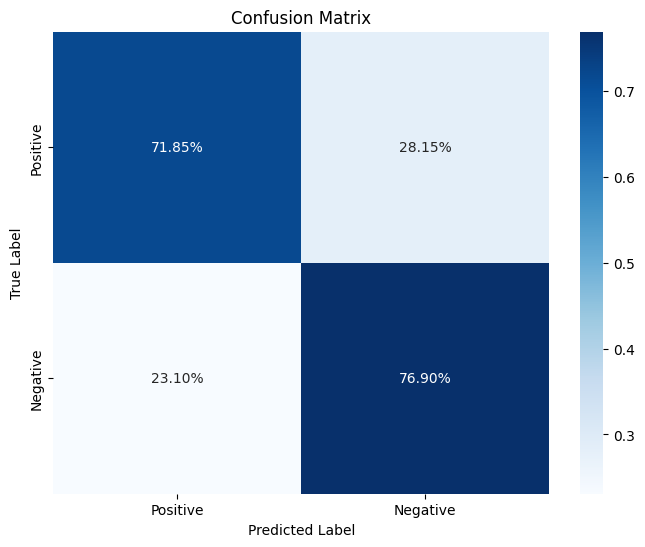

In [22]:
plot_confusion_matrix(y_test,y_pred_logreg)

## RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train_tfidf, y_train)

y_pred_rf = rf_classifier.predict(x_test_tfidf)

accuracy_rf= accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')

Accuracy: 0.7314642857142857


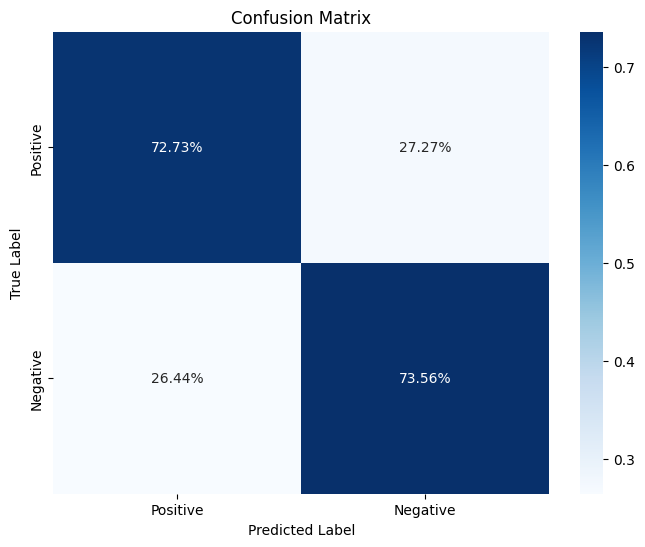

In [23]:
plot_confusion_matrix(y_test,y_pred_rf)

## XGBoost

In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_tfidf, y_train)
y_pred_xgb = xgb.predict(x_test_tfidf)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Accuracy: {accuracy_xgb}')

Accuracy: 0.7190357142857143


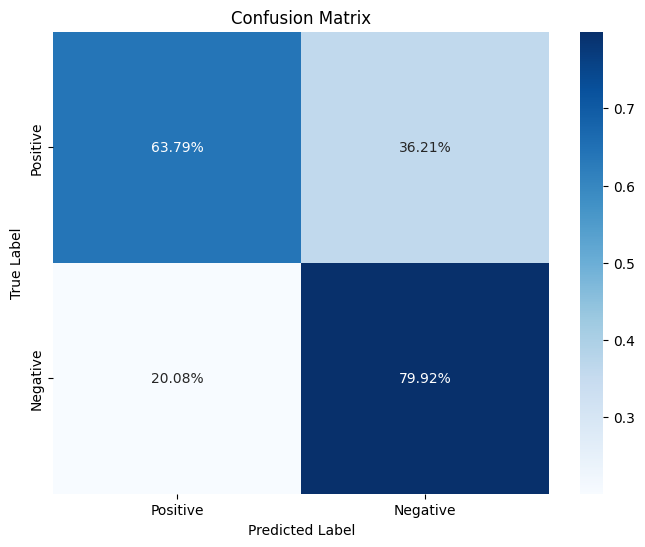

In [26]:
plot_confusion_matrix(y_test,y_pred_xgb)

## Compare the accuracy of the models

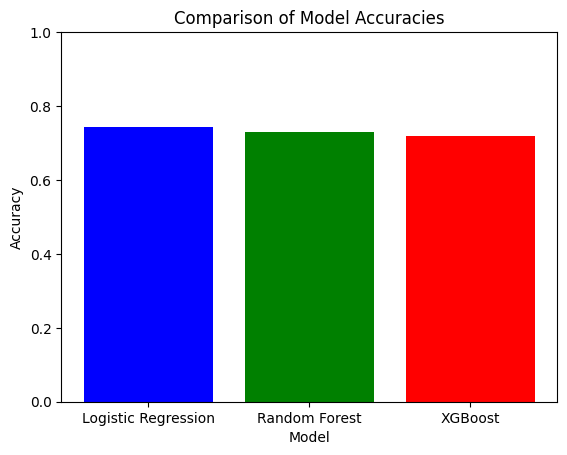

In [17]:
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [accuracy_logreg, accuracy_rf, accuracy_xgb]


plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Assuming accuracy values are between 0 and 1
plt.show()